In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
#%matplotlib widget


In [3]:
from sample_3d_view import sample_sphere, sample_torus, visualize_grid_sphere, visualize_grid_torus

In [4]:
from local_pca_utils import make_nearest_neighbors_graph, make_tangents

from curvature_utils import make_tangents_and_normals, get_second_fundamental_form

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
from mpl_toolkits.mplot3d import axes3d

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 24})

In [7]:
import itertools

from absl import logging

import numpy as np
import scipy
import scipy.sparse
import scipy.sparse.linalg

from tqdm import tqdm

In [8]:
npoints = 10000
latent_dim = 2

In [9]:
#data = sample_torus(npoints,2,1)
data = sample_sphere(npoints)
graph = make_nearest_neighbors_graph(data, 4, n=npoints)

100%|██████████| 10000/10000 [00:00<00:00, 28982.14it/s]


In [63]:
data = np.loadtxt('dragon.txt')
data = data[:, [0, 2, 1]]
np.random.shuffle(data)
npoints = data.shape[0]
graph = make_nearest_neighbors_graph(data, 20, n=22998)

100%|██████████| 22998/22998 [00:11<00:00, 1924.80it/s]


In [ ]:
data = np.loadtxt('vase.txt')
data = data[:, [2, 0, 1]]
#data = np.random.shuffle(data)
npoints = data.shape[0]
graph = make_nearest_neighbors_graph(data, 6, n=10692)

In [11]:
data.shape

(22998, 3)

In [58]:
np.random.shuffle(data)

In [64]:
origins = data
tangents, normals, local_coords, h_total, true_h = get_second_fundamental_form(data, graph, 2)

100%|██████████| 22998/22998 [00:06<00:00, 3597.94it/s]


In [65]:
displayn = 200
displayscale = 0.08


firstbasis = np.zeros((npoints, 6))
secondbasis = np.zeros((npoints, 6))
normalbasis = np.zeros((npoints, 6))

firstbasis[:,:3] = origins
firstbasis[:,3:] = tangents[:,0,:] * displayscale

secondbasis[:,:3] = origins
secondbasis[:,3:] = tangents[:,1,:] * displayscale


normalbasis[:,:3] = origins
normalbasis[:,3:] = normals[:,0,:] * displayscale


X, Y, Z, U, V, W = zip(*firstbasis[:displayn])
X2, Y2, Z2, U2, V2, W2= zip(*secondbasis[:displayn])
X3, Y3, Z3, U3, V3, W3= zip(*normalbasis[:displayn])

In [66]:
#fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
#fig, ax = visualize_grid_sphere()
#fig, ax = visualize_grid_torus(30,2,1)

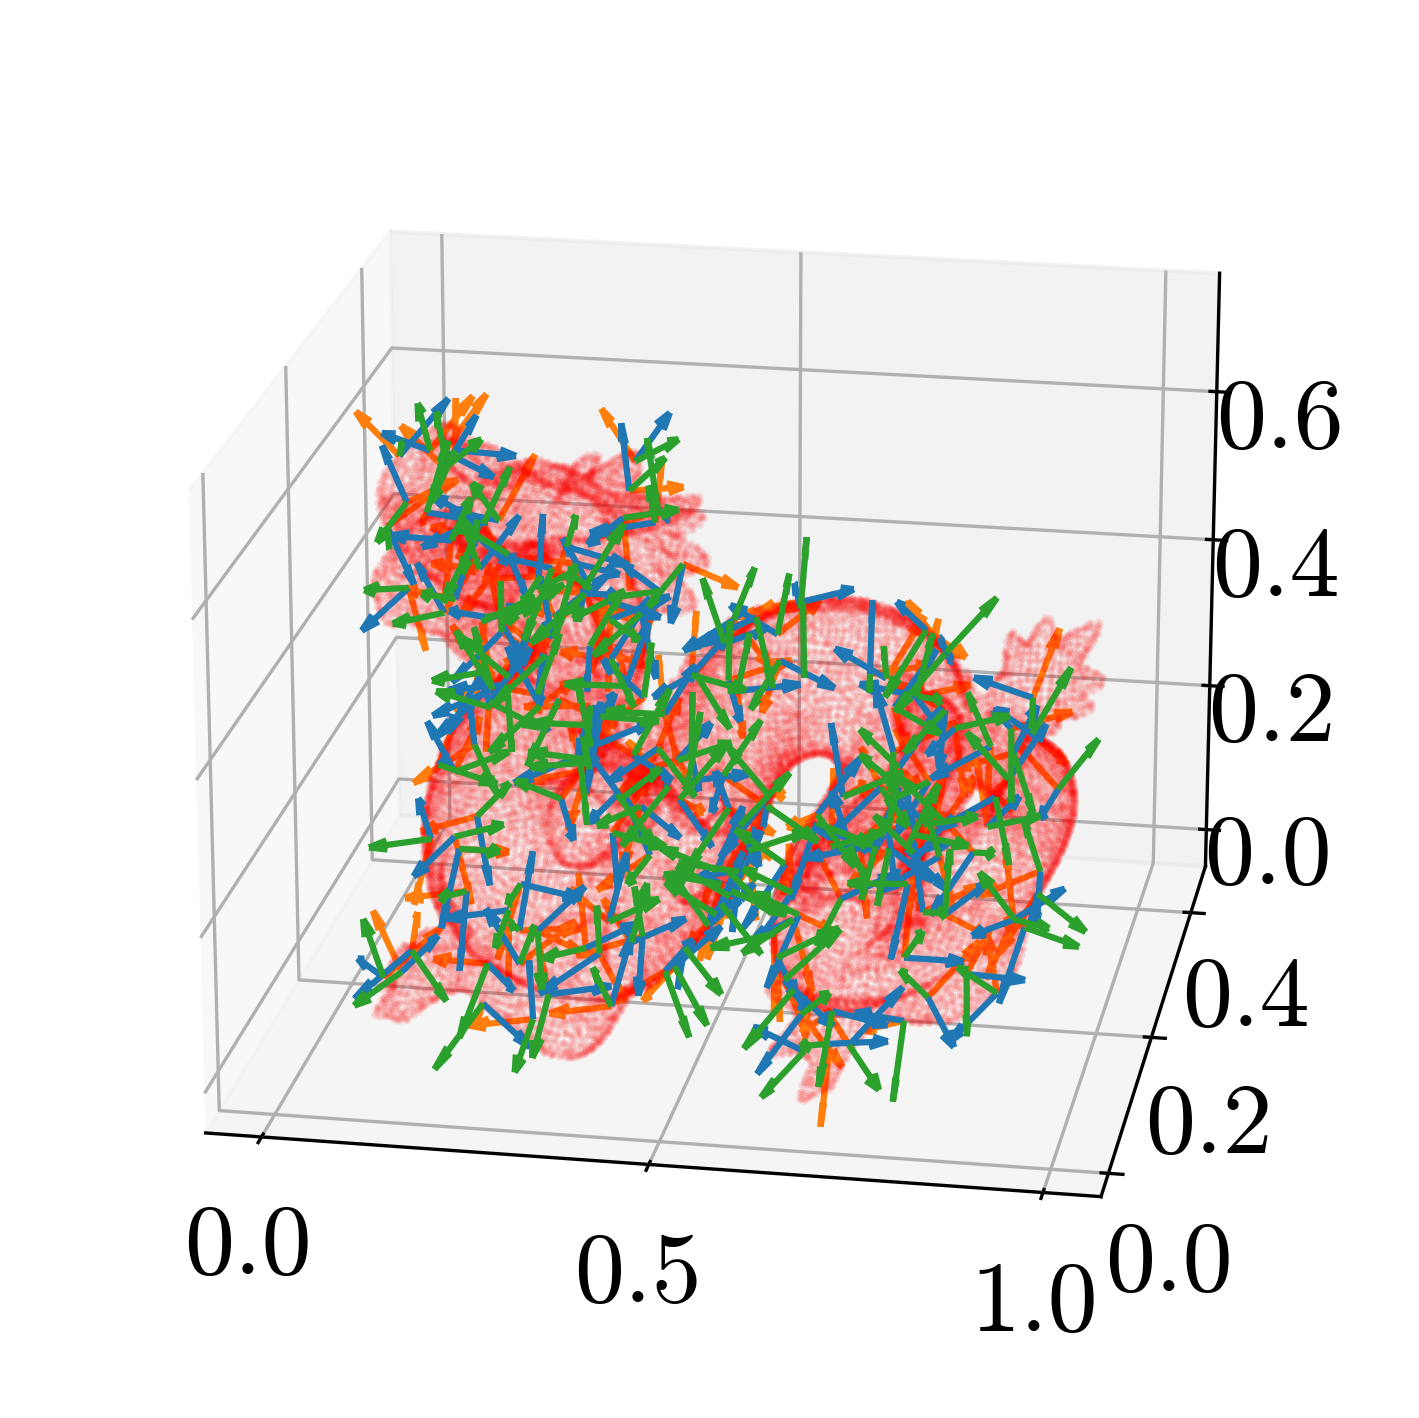

In [71]:
#ax.scatter(data[:100, 0], data[:100,1], data[:100,2], s=3, c='r', zorder=10)
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
ax.scatter(data[:,0], data[:, 1], data[:,2], s=1, zorder=10, alpha=0.1,c='r')
#ax.plot_trisurf(data[:,0], data[:, 1], data[:,2], edgecolor='none');
ax.quiver(X, Y, Z, U, V, W, color="C0")
ax.quiver(X2, Y2, Z2, U2, V2, W2, color="C1")
ax.quiver(X3, Y3, Z3, U3, V3, W3, color="C2")
ax.view_init(20, 280)


In [72]:
fig.savefig(f'../figures/normals_visualization_dragon.png')    
fig.savefig(f'../figures/normals_visualization_dragon.pdf')

In [69]:
fig.savefig(f'../figures/normals_visualization_S2.png')    
fig.savefig(f'../figures/normals_visualization_S2.pdf')

In [35]:
data_s2 = sample_sphere(npoints)

In [36]:
data_s2.shape

(10000, 3)

In [38]:
s2_graph = make_nearest_neighbors_graph(data_s2, 20, n=npoints)

100%|██████████| 10000/10000 [00:01<00:00, 7407.39it/s]


In [39]:
s2_graph

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 219538 stored elements in List of Lists format>

In [ ]:
s2_tangents, s2_normals, s2_h = get_second_fundamental_form(data_s2, s2_graph, 2)

In [51]:
np.ones(2,2)

TypeError: Cannot interpret '2' as a data type

In [41]:
k = 2

In [43]:
int(k*(k+1)/2)

3

In [17]:
s2_tangents.shape

(10000, 2, 3)

In [18]:
s2_normals.shape

(10000, 1, 3)

In [19]:
firstbasis = np.zeros((npoints, 6))
secondbasis = np.zeros((npoints, 6))
normalbasis = np.zeros((npoints, 6))

In [20]:
origins = data_s2

In [21]:
firstbasis[:,:3] = origins
firstbasis[:,3:] = s2_tangents[:,0,:]/4

In [22]:
secondbasis[:,:3] = origins
secondbasis[:,3:] = s2_tangents[:,1,:]/4

In [23]:
X, Y, Z, U, V, W = zip(*firstbasis[:100])

In [24]:
X2, Y2, Z2, U2, V2, W2= zip(*secondbasis[:100])

In [26]:
normalbasis[:,:3] = origins
normalbasis[:,3:] = s2_normals[:,0,:]/4

X3, Y3, Z3, U3, V3, W3= zip(*normalbasis[:100])

In [ ]:
s2_tangents, s2_normals = get_local_coordinates(data_s2, s2_graph, 2)

In [4]:
A = np.triu(np.ones((3,3)))

In [12]:
A

array([[1., 1., 1.],
       [0., 1., 1.],
       [0., 0., 1.]])

In [13]:
x, y = np.where(A>0)

In [14]:
x

array([0, 0, 0, 1, 1, 2])

In [15]:
np.arange(9.0)

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

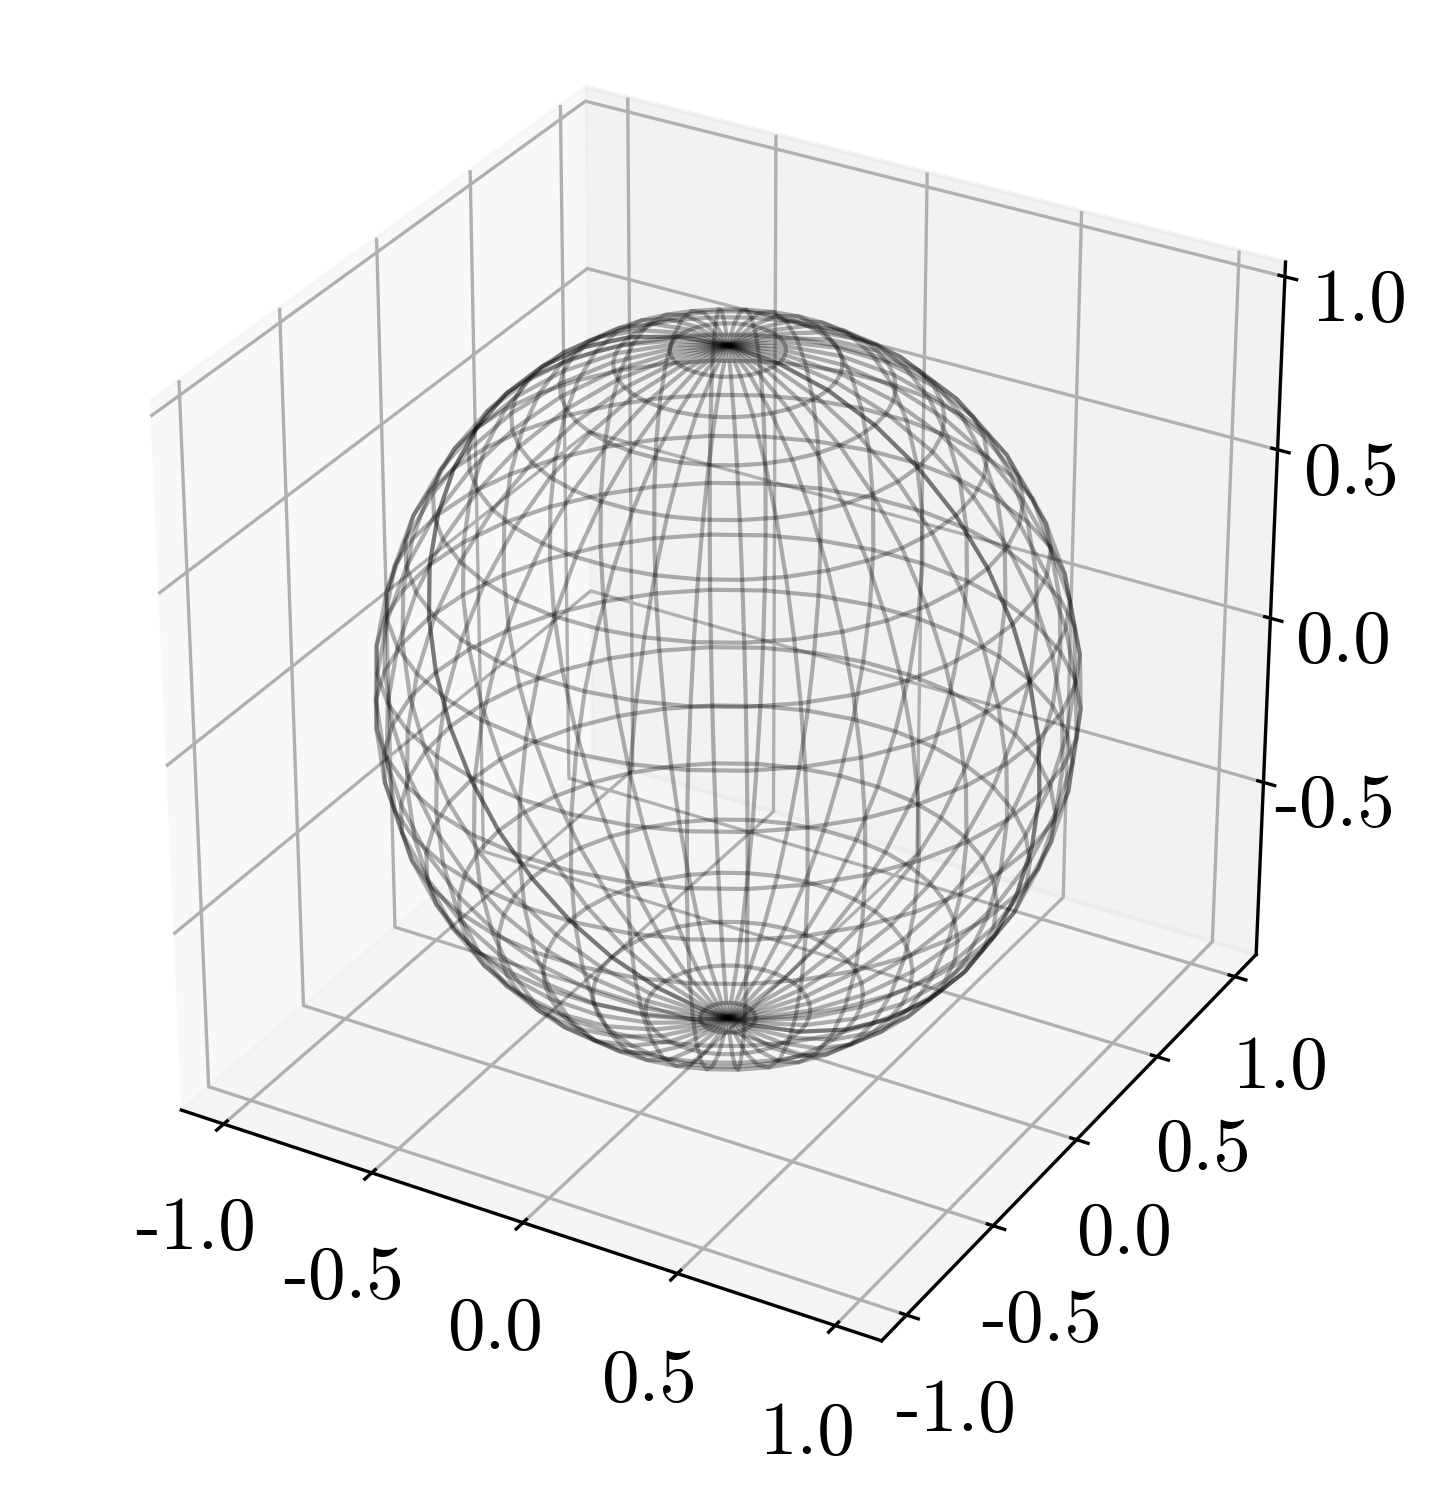

In [35]:
fig, ax = visualize_grid_sphere()

In [36]:
ax.scatter(data_s2[:100, 0], data_s2[:100,1], data_s2[:100,2], s=3, c='r', zorder=10)

In [37]:
ax.quiver(X, Y, Z, U, V, W, color="C0")

In [38]:
ax.quiver(X2, Y2, Z2, U2, V2, W2, color="C1")

In [39]:
ax.quiver(X3, Y3, Z3, U3, V3, W3, color="C2")

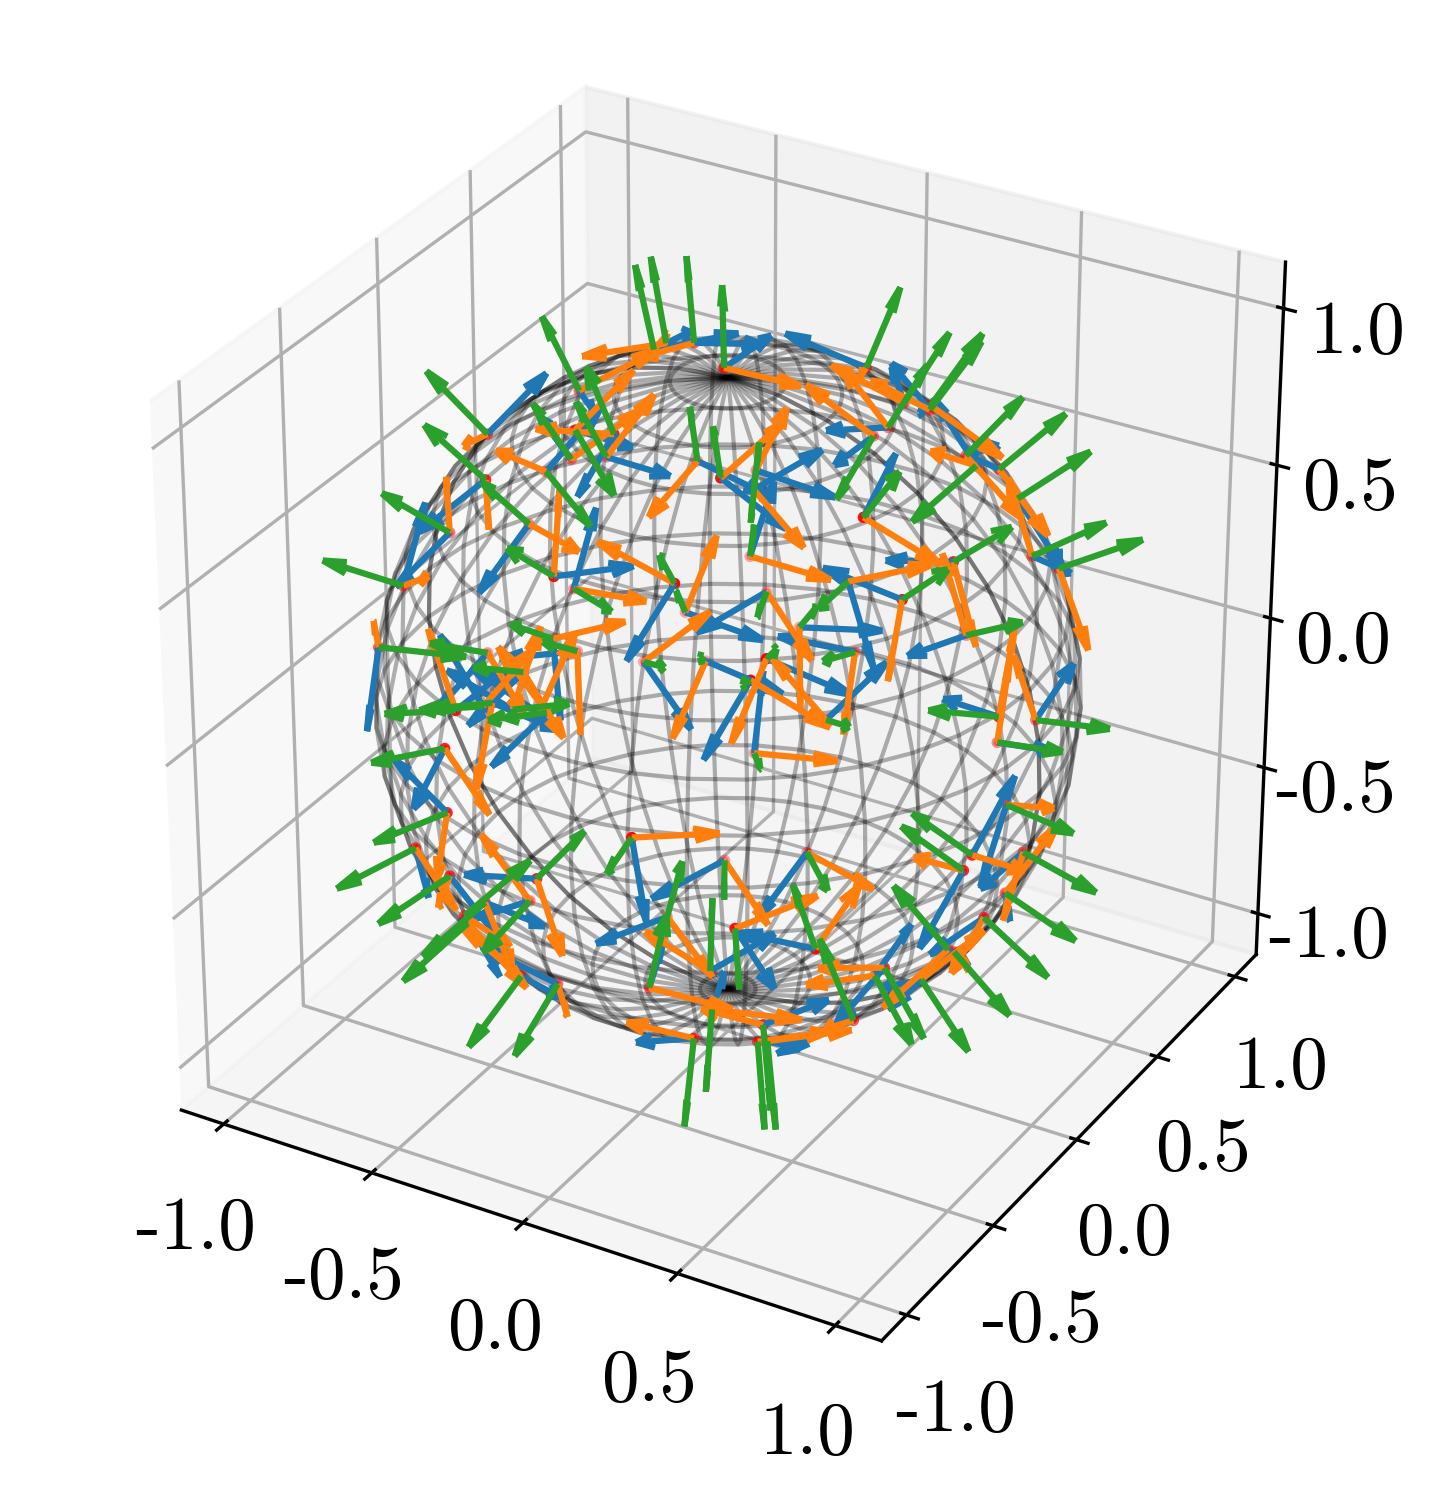

In [40]:
fig

In [69]:
fig.savefig(f'../figures/initial_3d_visualizations/tangents_visualization_S2.png')    
fig.savefig(f'../figures/initial_3d_visualizations/tangents_visualization_S2.pdf')

In [20]:
ax.scatter(data_s2[0,:], data_s2[1,:], data_s2[2,:], s=3, c='r', zorder=10)

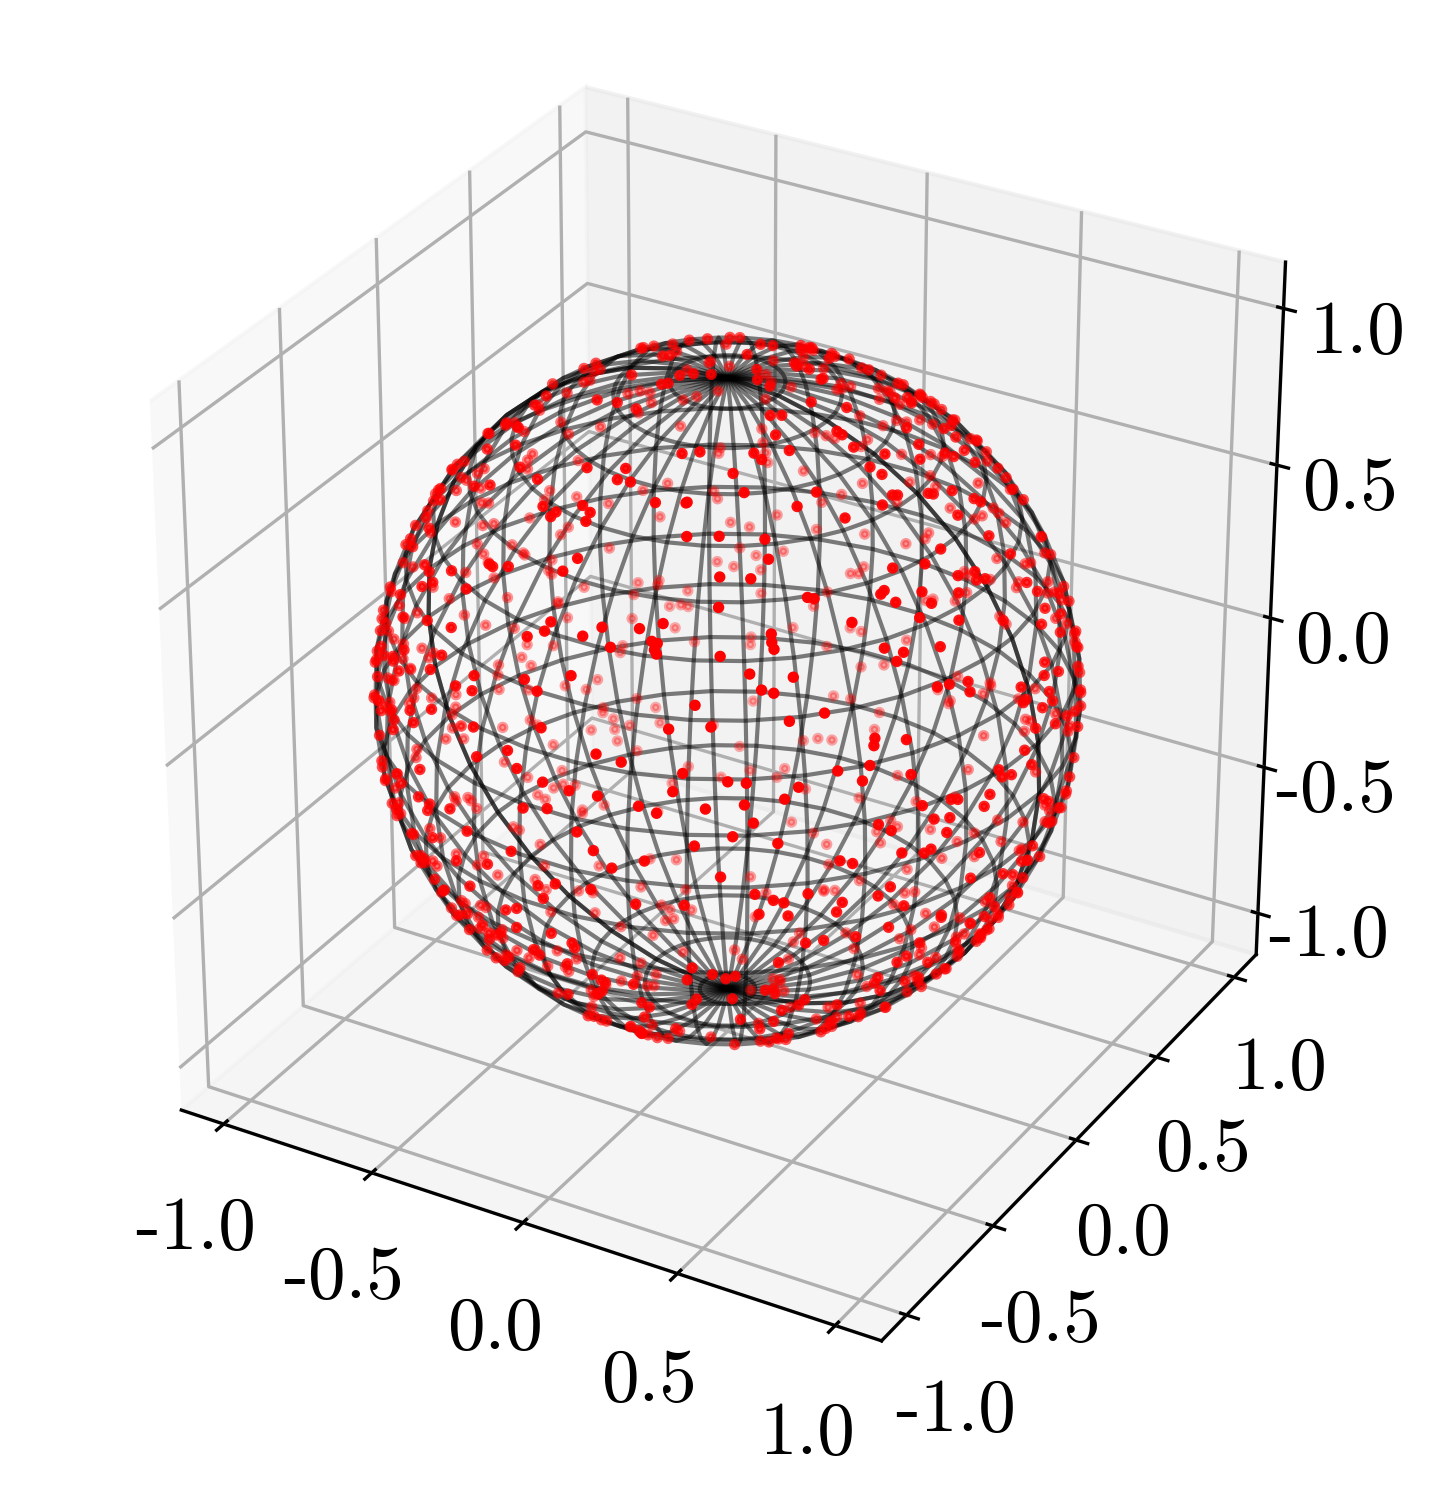

In [21]:
fig

In [22]:
fig.savefig(f'../figures/initial_3d_visualizations/datapoints_visualization_S2.png')    
fig.savefig(f'../figures/initial_3d_visualizations/datapoints_visualization_S2.pdf')

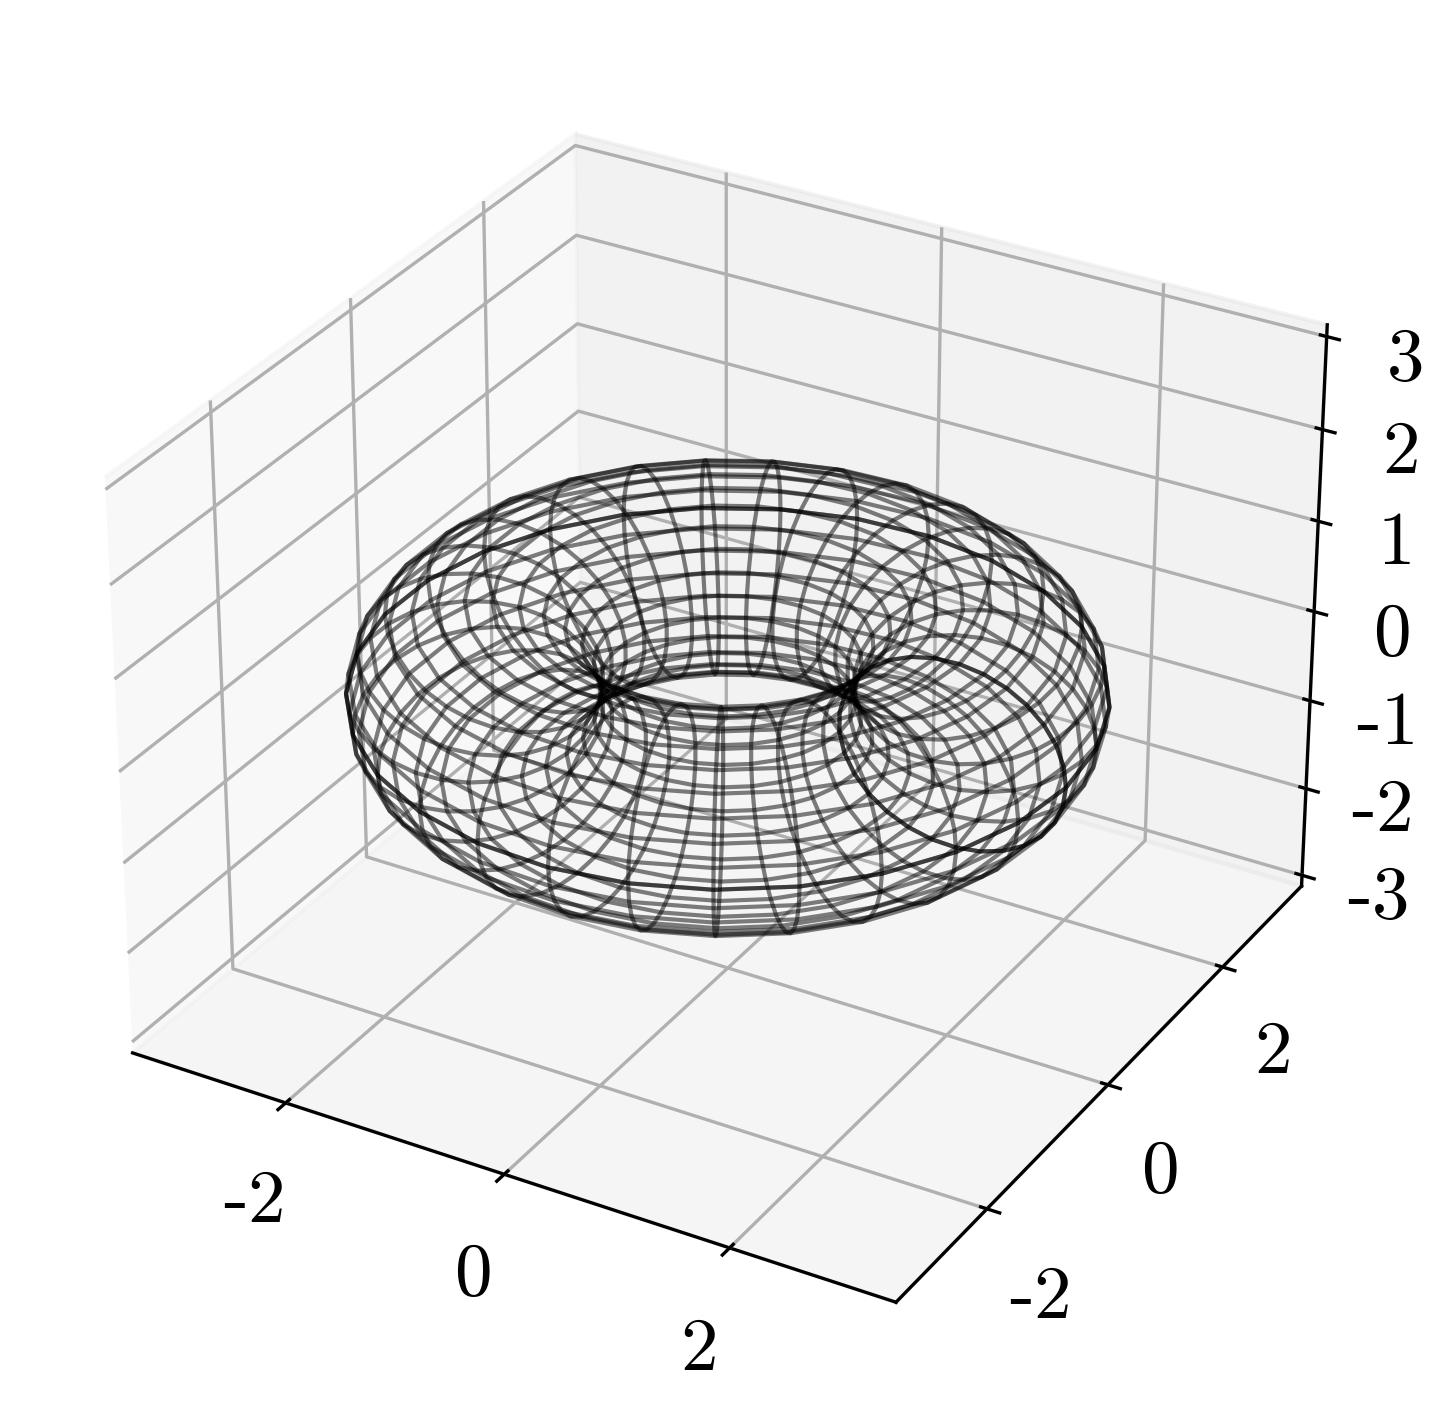

In [24]:
fig, ax = visualize_grid_torus(30,2,1)

In [25]:
ax.scatter(data_t[0,:], data_t[1,:], data_t[2,:], s=3, c='r', zorder=10)

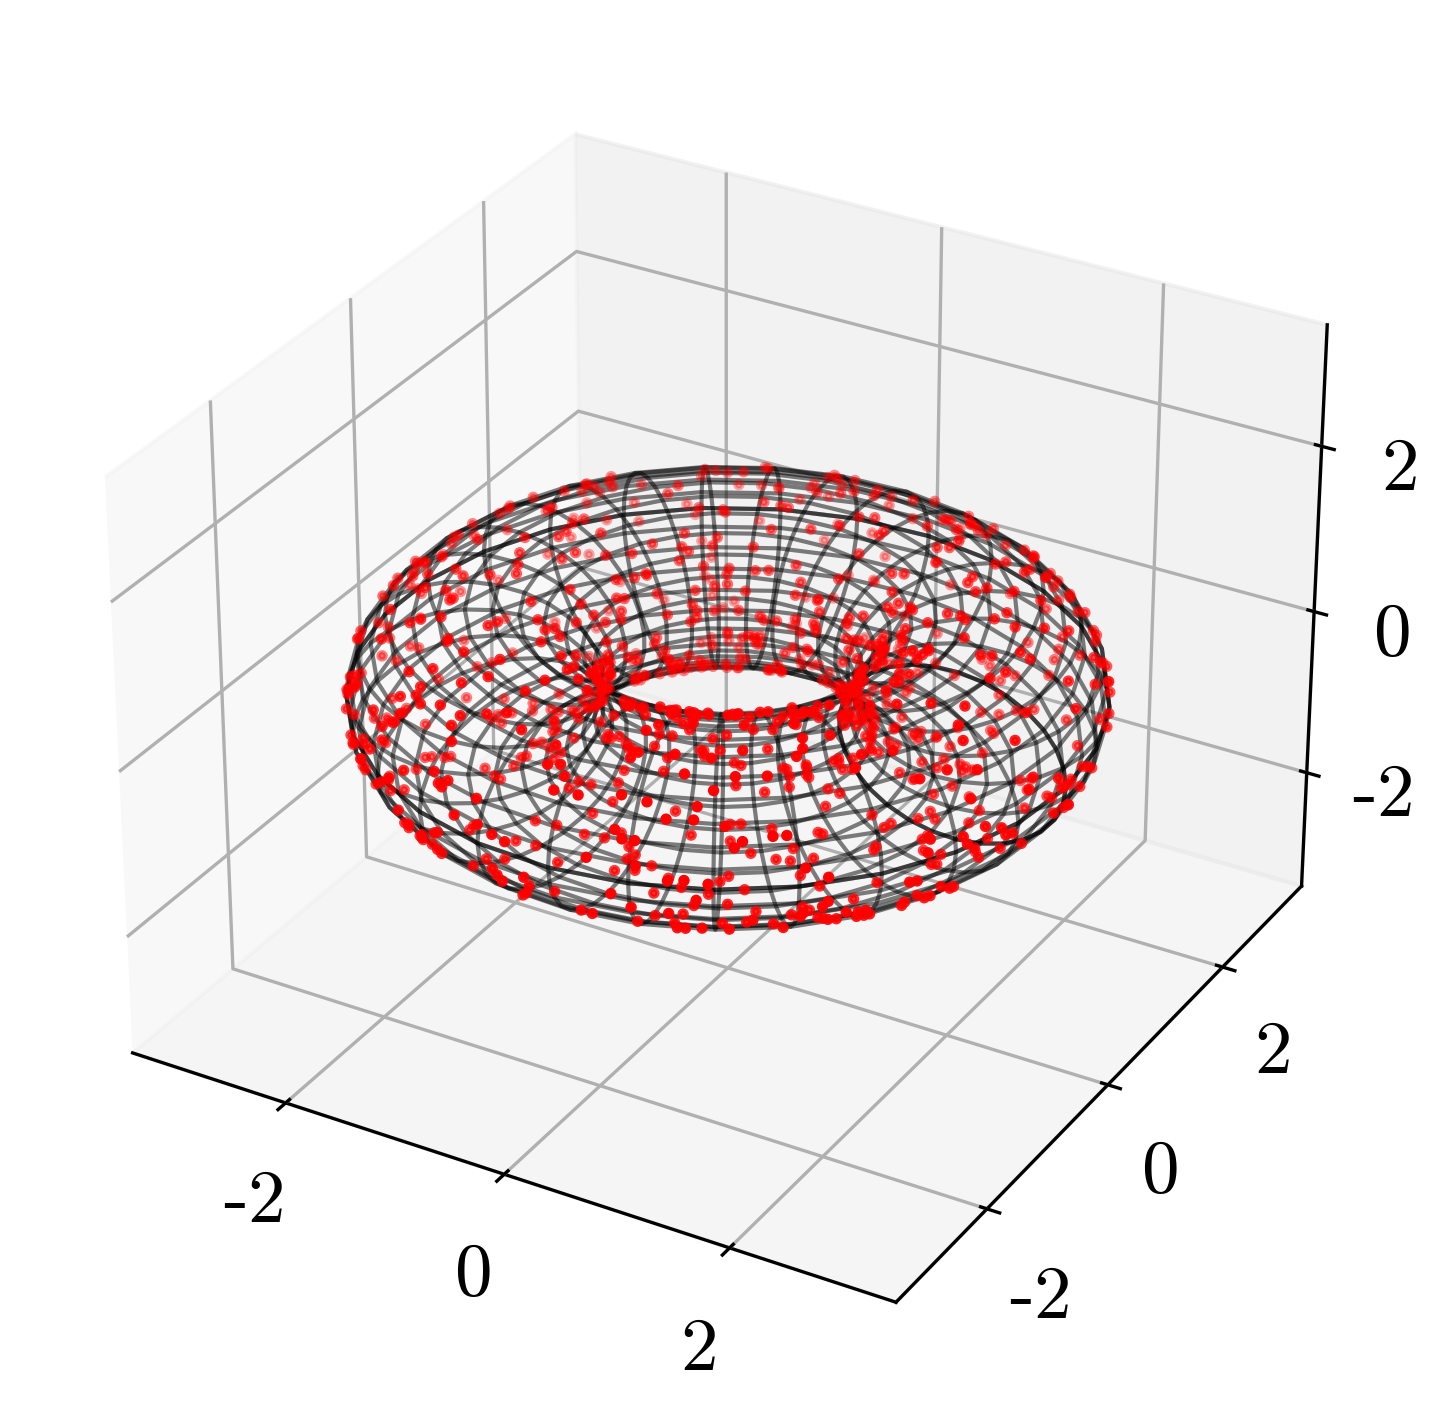

In [26]:
fig

In [27]:
fig.savefig(f'../figures/initial_3d_visualizations/datapoints_visualization_T.png')    
fig.savefig(f'../figures/initial_3d_visualizations/datapoints_visualization_T.pdf')

In [ ]:
phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

xi, yi, zi = sample_spherical(100)

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d', 'aspect':'equal'})
ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1)
ax.scatter(xi, yi, zi, s=100, c='r', zorder=10)